# Portfolio simulation
#### using Geometric Brownian Motion (GBM) model

https://towardsdatascience.com/stochastic-processes-simulation-brownian-motion-the-basics-c1d71585d9f9

S. E. Shreve, I. Karatzas, Brownian Motion and Stochastic Calculus (1998), Graduate Texts in Mathematics, Springer.

In [1]:
from typing import Optional
import numpy as np


def get_dW(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Sample T times from a normal distribution,
    to simulate discrete increments (dW) of a Brownian Motion.
    Optional random_state to reproduce results.
    """
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, T)


def get_W(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Simulate a Brownian motion discretely samplet at unit time increments.
    Returns the cumulative sum
    """
    dW = get_dW(T, random_state)
    # cumulative sum and then make the first index 0.
    dW_cs = dW.cumsum()
    return np.insert(dW_cs, 0, 0)[:-1]

def _get_correlated_dW(
    dW: np.ndarray, rho: float, random_state: Optional[int] = None
) -> np.ndarray:
    """
    Sample correlated discrete Brownian increments to given increments dW.
    """
    dW2 = get_dW(
        len(dW), random_state=random_state
    )  # generate Brownian icrements.
    if np.array_equal(dW2, dW):
        # dW cannot be equal to dW2.
        raise ValueError(
            "Brownian Increment error, try choosing different random state."
        )
    return rho * dW + np.sqrt(1 - rho ** 2) * dW2

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 [Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

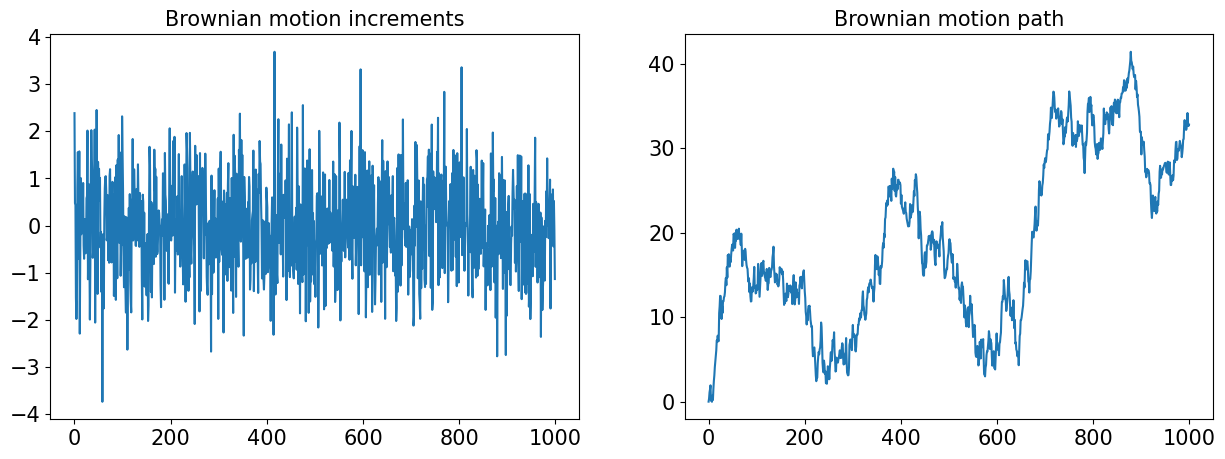

In [2]:
dW = get_dW(T=1_000)
W = get_W(T=1_000)

#----------------------------------------------------------------
# plot

import matplotlib.pyplot as plt 
import seaborn as sns

fig = plt.figure(figsize=(15, 5))

title = "Brownian motion increments"
plt.subplot(1, 2, 1)
plt.plot(dW)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Brownian motion path"
plt.subplot(1, 2, 2)
plt.plot(W)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)